In [39]:
%pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [42]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [43]:
df.shape

(962, 2)

# Exploring Categories

In [44]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

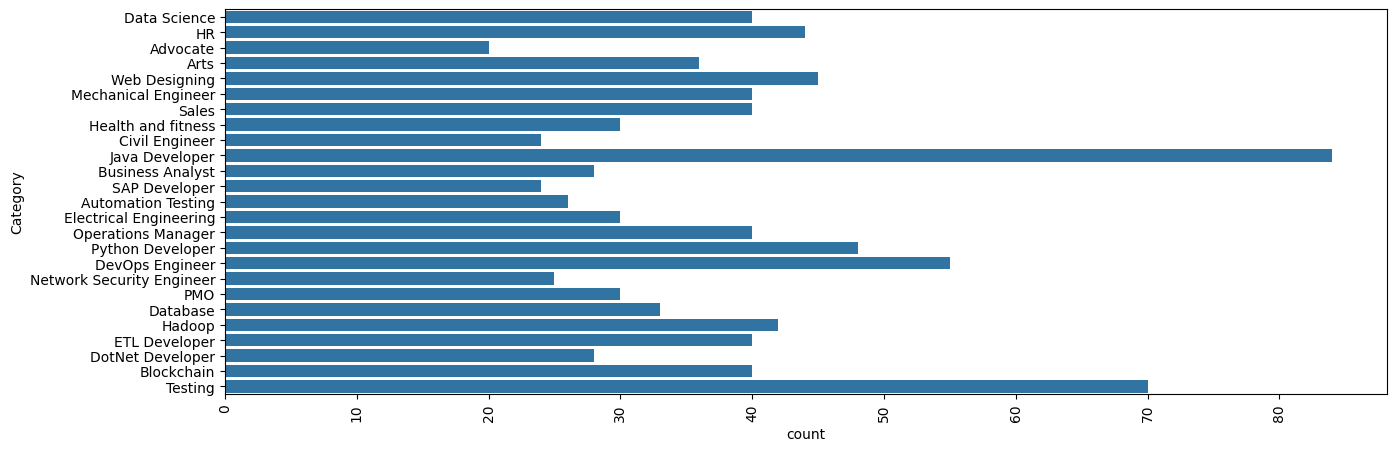

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [46]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

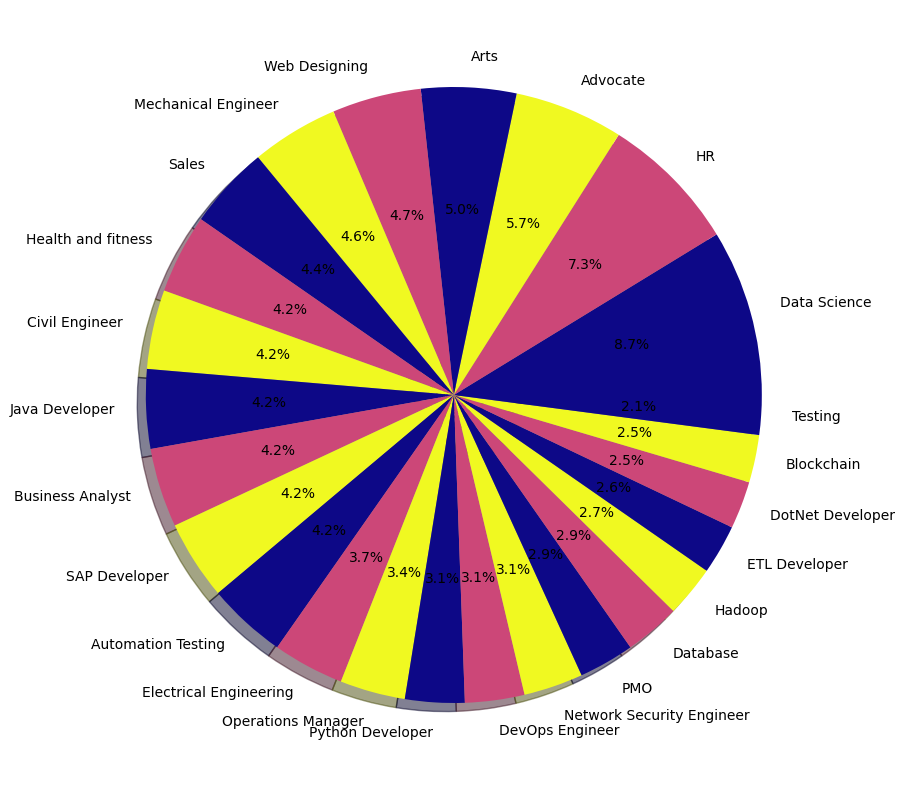

In [47]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

# Exploring Resume

In [48]:
df['Category'][0]

'Data Science'

In [49]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data:                                      
1 URLs,                                                
2 hashtags,                                             
3 mentions,                                                     
4 special letters,                                             
5 punctuations:                                             

In [50]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Mihir\AppData\Local\Temp\ipykernel_7116\3739445999.py:3: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\Mihir\AppData\Local\Temp\ipykernel_7116\3739445999.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\Mihir\AppData\Local\Temp\ipykernel_7116\3739445999.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\Mihir\AppData\Local\Temp

In [51]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [52]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# words into categorical values

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [55]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [56]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# Vactorization

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

# Splitting

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [60]:
X_train.shape

(769, 7351)

In [61]:
X_test.shape

(193, 7351)

# Now let’s train the model and print the classification report:

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [63]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

# Prediction System

In [64]:
import pickle
tfidfd= ""
pickle.dump(tfidfd,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [65]:
import os
import fitz  # PyMuPDF
import docx

folder_path = "./resume_parser/"

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Dictionary to store text from each file
all_resume_texts = {}

myresume = ""  # Variable to store the concatenated text of all files

for file in files:
    full_path = os.path.join(folder_path, file)

    if os.path.isfile(full_path):
        extension = os.path.splitext(file)[1].lower()

        if extension == ".pdf":
            print("Processing PDF:", full_path)
            doc = fitz.open(full_path)
            resume_text = ""

            for page in doc:
                resume_text += page.get_text()

            all_resume_texts[file] = resume_text
            doc.close()

        elif extension == ".docx":
            print("Processing DOCX:", full_path)
            doc = docx.Document(full_path)
            resume_text = ""

            for paragraph in doc.paragraphs:
                resume_text += paragraph.text

            all_resume_texts[file] = resume_text

# Accessing text of each file and concatenating into myresume
for filename, text in all_resume_texts.items():
    print(f"Text of document '{filename}':")
    myresume += text  # Concatenate text of each file
    print(text)


Processing PDF: ./resume_parser/Charles Obuseh.pdf
Processing PDF: ./resume_parser/documents20220826-1-v01cla.pdf
Processing PDF: ./resume_parser/documents20220828-1-1fs1dgp.pdf
Processing PDF: ./resume_parser/documents20220830-1-eq72bl.pdf
Processing PDF: ./resume_parser/DS Updated 2.pdf
Processing PDF: ./resume_parser/Januka Pandey Gautam.pdf
Processing PDF: ./resume_parser/Maaz khan _ d17.pdf
Processing PDF: ./resume_parser/Maximillian Wiesner.pdf
Processing PDF: ./resume_parser/NYU CDS-Revelio Labs Resume Book_Fall 2022 Career Fair (Full-Time).pdf
Processing PDF: ./resume_parser/NYU CDS-Revelio Labs Resume Book_Fall 2022 Career Fair (Internship).pdf
Processing DOCX: ./resume_parser/Om Prakash Karmacharya1.docx
Processing PDF: ./resume_parser/Omer_CELEBI_CV.pdf
Processing DOCX: ./resume_parser/Praveen Batchu .docx
Processing DOCX: ./resume_parser/Priyadarshini Sadam.docx
Processing PDF: ./resume_parser/resume.pdf
Processing PDF: ./resume_parser/resume_maxwiesner.pdf
Processing PDF: 

In [66]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [67]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# For demonstration, let's assume we have extracted some skills from the resume
extracted_skills = ["Python", "Java", "TensorFlow", "PyTorch", "pandas", "SQL", "HTML", "CSS", "JavaScript"]

# Map skills to job categories
skill_category_mapping = {
    "Java Developer": ["Java", "Spring", "Hibernate", "Maven", "JSP", "Servlets"],
    "Testing": ["Software Testing", "Test Automation", "Selenium", "JUnit", "TestNG"],
    "DevOps Engineer": ["Docker", "Kubernetes", "Jenkins", "Git", "Ansible", "Puppet"],
    "Python Developer": ["Python", "Django", "Flask", "NumPy", "Pandas", "Matplotlib"],
    "Web Designing": ["HTML", "CSS", "JavaScript", "Bootstrap", "jQuery", "AngularJS"],
    # Add more categories and their associated skills as needed
}

# Initialize a dictionary to store the count of matching skills for each category
matching_skills_count = {category: 0 for category in skill_category_mapping}

# Count the matching skills for each category
for category, skills in skill_category_mapping.items():
    for skill in skills:
        if skill in extracted_skills:
            matching_skills_count[category] += 1

# Determine the predicted category with the maximum matching skills count
predicted_category = max(matching_skills_count, key=matching_skills_count.get)

print("Predicted Category:", predicted_category)


Predicted Category: Web Designing


In [68]:
import os
import fitz  # PyMuPDF
import docx
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
import pickle

# Download NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def cleanResume(text):
    # Define your cleaning process here
    # For example, remove special characters, punctuation, etc.
    return text

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

# Define folder path
folder_path = "./resume_parser/"

# Initialize a list to store resume information
resumes_info = []

# Process each file in the folder
for file in os.listdir(folder_path):
    full_path = os.path.join(folder_path, file)
    if os.path.isfile(full_path):
        # Extract text from PDF files
        if file.endswith(".pdf"):
            print("Processing PDF:", full_path)
            doc = fitz.open(full_path)
            resume_text = ""
            for page in doc:
                resume_text += page.get_text()
            doc.close()
        # Extract text from DOCX files
        elif file.endswith(".docx"):
            print("Processing DOCX:", full_path)
            doc = docx.Document(full_path)
            resume_text = ""
            for paragraph in doc.paragraphs:
                resume_text += paragraph.text
        else:
            continue

        # Clean the resume text
        cleaned_resume = cleanResume(resume_text)

        # Tokenize text into sentences
        sentences = sent_tokenize(cleaned_resume)

        # Extract skills and education from each sentence
        skills = set()
        education = set()
        for sentence in sentences:
            words = word_tokenize(sentence)
            tagged_words = pos_tag(words)
            for word, tag in tagged_words:
                if tag == 'NN' or tag == 'NNP' or tag == 'NNS':
                    skills.add(word)
                elif tag == 'NNP' and word.lower() in {"bachelor's", "master's", "phd"}:
                    education.add(" ".join([word, tagged_words[words.index(word) + 1][0]]))

        # Use the pre-trained classifier to predict the category based on skills
        # For demonstration, let's assume we have extracted some skills from the resume
        extracted_skills = list(skills)

        # Initialize a dictionary to store the count of matching skills for each category
        matching_skills_count = {category: 0 for category in category_mapping}

        # Count the matching skills for each category
        for category, skills in category_mapping.items():
            for skill in skills.split(", "):  # Split skills by comma and space
                if skill in extracted_skills:
                    matching_skills_count[category] += 1

        # Determine the predicted category with the maximum matching skills count
        predicted_category_id = max(matching_skills_count, key=matching_skills_count.get)
        predicted_category = category_mapping.get(predicted_category_id, "Unknown")

        # Construct resume information dictionary
        resume_info = {
            "File": file,
            "Predicted Job Title": predicted_category,
            "Skills": extracted_skills,
            "Education": list(education)
        }

        # Append resume information to the list
        resumes_info.append(resume_info)

# Display resume information
for resume_info in resumes_info:
    print("File:", resume_info["File"])
    print("Predicted Job Title:", resume_info["Predicted Job Title"])
    print("Skills:", resume_info["Skills"])
    print("Education:", resume_info["Education"])
    print()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Processing PDF: ./resume_parser/Charles Obuseh.pdf
Processing PDF: ./resume_parser/documents20220826-1-v01cla.pdf
Processing PDF: ./resume_parser/documents20220828-1-1fs1dgp.pdf
Processing PDF: ./resume_parser/documents20220830-1-eq72bl.pdf
Processing PDF: ./resume_parser/DS Updated 2.pdf
Processing PDF: ./resume_parser/Januka Pandey Gautam.pdf
Processing PDF: ./resume_parser/Maaz khan _ d17.pdf
Processing PDF: ./resume_parser/Maximillian Wiesner.pdf
Processing PDF: ./resume_parser/NYU CDS-Revelio Labs Resume Book_Fall 2022 Career Fair (Full-Time).pdf
Processing PDF: ./resume_parser/NYU CDS-Revelio Labs Resume Book_Fall 2022 Career Fair (Internship).pdf
Processing DOCX: ./resume_parser/Om Prakash Karmacharya1.docx
Processing PDF: ./resume_parser/Omer_CELEBI_CV.pdf
Processing DOCX: ./resume_parser/Praveen Batchu .docx
Processing DOCX: ./resume_parser/Priyadarshini Sadam.docx
Processing PDF: ./resume_parser/resume.pdf
Processing PDF: ./resume_parser/resume_maxwiesner.pdf
Processing PDF: 

In [69]:
import os
import fitz  # PyMuPDF
import docx
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
import pickle

# Download NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def cleanResume(text):
    # Define your cleaning process here
    # For example, remove special characters, punctuation, etc.
    return text

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Map category ID to category name
category_mapping = {
    0: "Advocate",
    1: "Arts",
    2: "Automation Testing",
    3: "Blockchain",
    4: "Business Analyst",
    5: "Civil Engineer",
    6: "Data Science",
    7: "Database",
    8: "DevOps Engineer",
    9: "DotNet Developer",
    10: "ETL Developer",
    11: "Electrical Engineering",
    12: "HR",
    13: "Hadoop",
    14: "Health and fitness",
    15: "Java Developer",
    16: "Mechanical Engineer",
    17: "Network Security Engineer",
    18: "Operations Manager",
    19: "PMO",
    20: "Python Developer",
    21: "SAP Developer",
    22: "Sales",
    23: "Testing",
    24: "Web Designing",
    25: "UI/UX Designer",
    26: "Content Writer",
    27: "Customer Service Representative",
    28: "Financial Analyst",
    29: "Legal Assistant",
    30: "Marketing Specialist",
    31: "Project Manager",
    32: "Software Engineer",
    33: "System Administrator",
    34: "Technical Support Specialist",
    35: "UI Developer",
    36: "UX Researcher",
    37: "Web Developer",
    38: "Graphic Designer",
    39: "iOS Developer",
    40: "Android Developer",
    41: "Full Stack Developer",
    42: "Front End Developer",
    43: "Back End Developer",
    44: "Game Developer",
    45: "Mobile App Developer",
    46: "Embedded Systems Engineer",
    47: "Cloud Architect",
    48: "Cloud Engineer",
    49: "Network Engineer",
    50: "System Analyst",
    51: "UI Designer",
    52: "UX Designer",
    53: "Product Manager",
    54: "Scrum Master",
    55: "Agile Coach",
    56: "Agile Project Manager",
    57: "Quality Assurance Engineer",
    58: "Quality Control Engineer",
    59: "Technical Writer",
    60: "Instructional Designer",
    61: "Cybersecurity Analyst",
    62: "Ethical Hacker",
    63: "Penetration Tester",
    64: "Digital Marketing Specialist",
    65: "SEO Specialist",
    66: "SEM Specialist",
    67: "Social Media Manager",
    68: "Content Strategist",
    69: "Brand Manager",
    70: "Public Relations Specialist",
    71: "Event Planner",
    72: "Market Research Analyst",
    73: "Data Analyst",
    74: "Business Intelligence Analyst",
    75: "Financial Planner",
    76: "Investment Analyst",
    77: "Tax Consultant",
    78: "Accountant",
    79: "Auditor",
    80: "Actuary",
    81: "Insurance Underwriter",
    82: "Loan Officer",
    83: "Mortgage Broker",
    84: "Real Estate Agent",
    85: "Property Manager",
    86: "Construction Manager",
    87: "Architect",
    88: "Interior Designer",
    89: "Urban Planner",
    90: "Surveyor",
    91: "Environmental Engineer",
    92: "Geotechnical Engineer",
    93: "Petroleum Engineer",
    94: "Chemical Engineer",
    95: "Materials Engineer",
    96: "Industrial Engineer",
    97: "Manufacturing Engineer",
    98: "Process Engineer",
    99: "Product Engineer",
    100: "Quality Engineer",
    101: "Network Administrator",
    102: "Network Architect",
    103: "Systems Analyst",
    104: "Database Administrator",
    105: "Data Architect",
    106: "Data Manager",
    107: "Data Scientist",
    108: "Machine Learning Engineer",
    109: "AI Engineer",
    110: "Big Data Engineer",
    111: "Cybersecurity Engineer",
    112: "Information Security Analyst",
    113: "Security Operations Center (SOC) Analyst",
    114: "IT Support Specialist",
    115: "Help Desk Technician",
    116: "IT Consultant",
    117: "IT Auditor",
    118: "Systems Administrator",
    119: "Systems Engineer",
    120: "IT Project Manager",
    121: "Network Technician",
    122: "Network Analyst",
    123: "Technical Support Engineer",
    124: "Software Tester",
    125: "Quality Assurance Analyst",
    126: "Application Support Analyst",
    127: "Software Architect",
    128: "IT Manager",
    129: "Chief Technology Officer (CTO)",
    130: "Chief Information Officer (CIO)",
    131: "Information Technology Director",
    132: "IT Security Consultant",
    133: "Computer Programmer",
    134: "Software Developer",
    135: "Computer Systems Analyst",
    136: "IT Business Analyst",
    137: "UX/UI Designer",
    138: "Mobile Developer",
    139: "Cloud Solutions Architect",
    140: "Technical Writer",
    141: "Business Intelligence Developer",
    142: "Database Developer",
    143: "Network Administrator",
    144: "Systems Engineer",
    145: "Web Administrator",
    146: "LAN/WAN Administrator",
    147: "Information Systems Manager",
    148: "IT Trainer",
    149: "VoIP Engineer",
    150: "IT Technician",
    151: "Information Technology Specialist",
    152: "Computer Systems Administrator",
    153: "Computer Network Architect",
    154: "Computer Systems Manager",
    155: "Desktop Support Specialist",
    156: "Software Implementation Consultant",
    157: "Information Technology Manager",
    158: "IT Coordinator",
    159: "IT Support Manager",
    160: "Network Manager",
    161: "Security Analyst",
    162: "Computer Support Specialist",
    163: "IT Operations Manager",
    164: "Network and Computer Systems Administrator",
    165: "Network Operations Center (NOC) Technician",
    166: "Systems Software Engineer",
    167: "Network and Information Systems Manager",
    168: "Technical Services/Support Manager",
    169: "Computer Programmer",
    170: "Software Quality Assurance (QA) Engineer",
    171: "Computer and Information Research Scientist",
    172: "Information Security Analyst",
    173: "Database Administrator",
    174: "Computer Network Support Specialist",
    175: "Computer Systems Analyst",
    176: "Software Applications Architect",
    177: "Computer Hardware Engineer",
    178: "Computer Network Architect",
    179: "Software Development Manager",
    180: "Computer Systems Analyst",
    181: "Computer Systems Manager",
    182: "Software Systems Engineer",
    183: "Cloud Computing Analyst",
    184: "Senior Network Engineer",
    185: "Senior Systems Analyst",
    186: "Senior Software Engineer",
    187: "Senior IT Consultant",
    188: "Senior IT Auditor",
    189: "Senior IT Project Manager",
    190: "Senior Technical Support Engineer",
    191: "Senior Database Administrator",
    192: "Senior Information Security Analyst",
    193: "Senior Computer Programmer",
    194: "Senior Software Developer",
    195: "Senior Systems Administrator",
    196: "Senior IT Manager",
    197: "Senior Systems Engineer",
    198: "Senior Network Administrator",
    199: "Senior IT Specialist",
}



# Define folder path
folder_path = "./resume_parser/"

# Initialize a list to store resume information
resumes_info = []

# Define output file path
output_file_path = "./resume_output.txt"

# Process each file in the folder
with open(output_file_path, "w", encoding="utf-8") as output_file:
    for file in os.listdir(folder_path):
        full_path = os.path.join(folder_path, file)
        if os.path.isfile(full_path):
            # Extract text from PDF files
            if file.endswith(".pdf"):
                output_file.write(f"Processing PDF: {full_path}\n")
                doc = fitz.open(full_path)
                resume_text = ""
                for page in doc:
                    resume_text += page.get_text()
                doc.close()
            # Extract text from DOCX files
            elif file.endswith(".docx"):
                output_file.write(f"Processing DOCX: {full_path}\n")
                doc = docx.Document(full_path)
                resume_text = ""
                for paragraph in doc.paragraphs:
                    resume_text += paragraph.text
            else:
                continue

            # Clean the resume text
            cleaned_resume = cleanResume(resume_text)

            # Tokenize text into sentences
            sentences = sent_tokenize(cleaned_resume)

            # Extract skills and education from each sentence
            skills = set()
            education = set()
            for sentence in sentences:
                words = word_tokenize(sentence)
                tagged_words = pos_tag(words)
                for word, tag in tagged_words:
                    if tag == 'NN' or tag == 'NNP' or tag == 'NNS':
                        skills.add(word)
                    elif tag == 'NNP' and word.lower() in {"bachelor's", "master's", "phd"}:
                        education.add(" ".join([word, tagged_words[words.index(word) + 1][0]]))

            # Use the pre-trained classifier to predict the category based on skills
            # For demonstration, let's assume we have extracted some skills from the resume
            extracted_skills = list(skills)

            # Initialize a dictionary to store the count of matching skills for each category
            matching_skills_count = {category: 0 for category in category_mapping}

            # Count the matching skills for each category
            for category, category_name in category_mapping.items():
                for skill in category_name.split(", "):  # Split skills by comma and space
                    if skill in extracted_skills:
                        matching_skills_count[category] += 1

            # Determine the predicted category with the maximum matching skills count
            predicted_category_id = max(matching_skills_count, key=matching_skills_count.get)
            predicted_category = category_mapping.get(predicted_category_id, "Unknown")

            # Construct resume information dictionary
            resume_info = {
                "File": file,
                "Predicted Job Title": predicted_category,
                "Skills": extracted_skills,
                "Education": list(education)
            }

            # Append resume information to the list
            resumes_info.append(resume_info)

            # Write resume information to the output file
            output_file.write(f"File: {resume_info['File']}\n")
            output_file.write(f"Predicted Job Title: {resume_info['Predicted Job Title']}\n")
            output_file.write("Skills: {}\n".format(", ".join(resume_info['Skills'])))
            output_file.write("Education: {}\n\n".format(", ".join(resume_info['Education'])))

# Inform the user that processing is complete
print("Processing complete. Output written to:", output_file_path)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Processing complete. Output written to: ./resume_output.txt
